# Notes made while I was reading opencv tutorial about [Image Processing](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_table_of_contents_imgproc/py_table_of_contents_imgproc.html#py-table-of-content-imgproc)

In [1]:
%matplotlib inline
import cv2

from matplotlib import pyplot as plt
import numpy as np
import time as t

print(cv2.__version__)

3.2.0


In [2]:
img = cv2.imread('subway_2.png', 3)
def custom_convert(image):    
    img = np.zeros_like(image)
    img[:,:,0] = image[:,:,2]
    img[:,:,1] = image[:,:,1]
    img[:,:,2] = image[:,:,0]
    return img

def show_image(cv_image):
    rows, cols, *channels = cv_image.shape
    channels = channels and channels[0]
    image = cv_image
    print(channels)

    if channels == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #img2 = custom_convert(img)
        plt.imshow(image)
    else:
        plt.imshow(image, cmap='gray')
    plt.show()

[14 85 57]
3


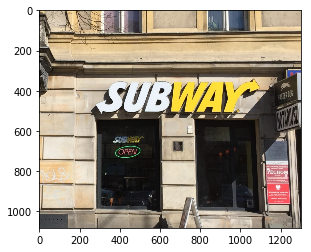

[]


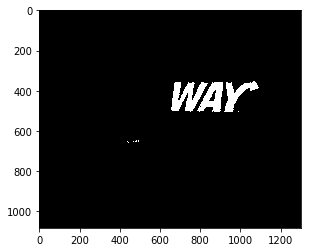

3


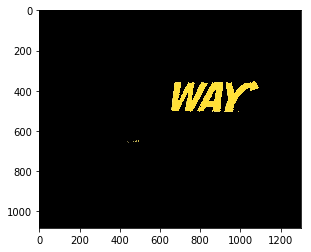

In [3]:
img = cv2.imread("subway_2.png")

# Convert BGR to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# _1: cv2.circle(img,(1200,300), 10, (0,0,255), -1)
# logo: cv2.circle(img,(2900,400), 100, (0,0,255), -1)

print(hsv[300,1200])

# h, s, v = hsv[300,1200]
# define range of blue color in HSV
lower_yellow = np.array([25,100,100])
upper_yellow = np.array([38,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(img, img, mask=mask)
show_image(img)
show_image(mask)
show_image(res)

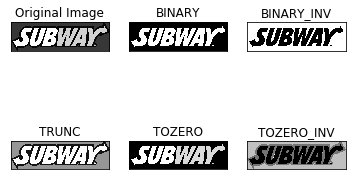

In [4]:
# Treshold types
img = cv2.imread('subway_logo.png',3)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

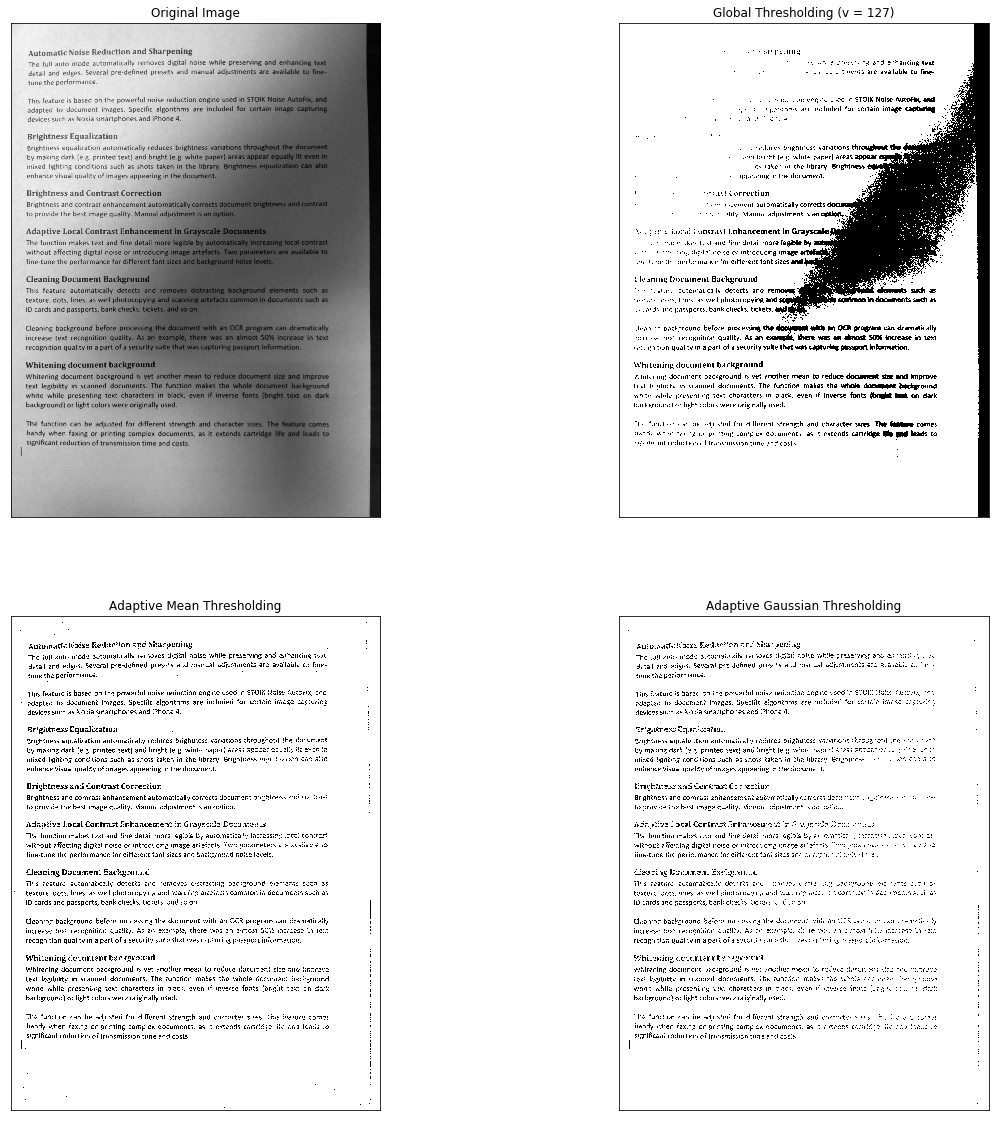

In [5]:
# Adaptive threshold

img = cv2.imread('scan.jpg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,60,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 4)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 4)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.figure(figsize=(20,20))
for i in range(4):
    plt.subplot(2, 2, i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

(1437, 5000, 3)
3


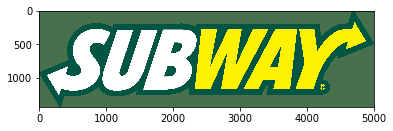

3


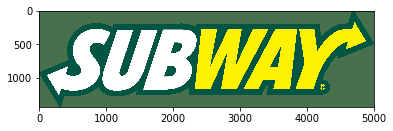

3


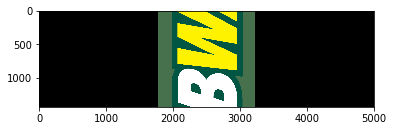

In [6]:
# Affine
img = cv2.imread('subway_logo.png', 3)
print(img.shape)
rows,cols, channels = img.shape

show_image(img)
M = cv2.getRotationMatrix2D((cols/2,rows/2), 90, 1)
dst = cv2.warpAffine(img, M, (cols,rows))
show_image(img)
show_image(dst)

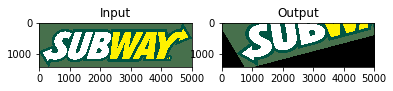

In [7]:
# linear point to point
img = cv2.imread('subway_logo.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

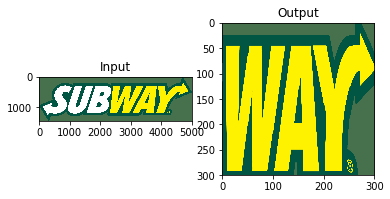

In [8]:
# Perspective
img = cv2.imread('subway_logo.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

rows,cols,ch = img.shape

pts1 = np.float32([[2390,100],[5000,100],[2250,1200],[4600,1200]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

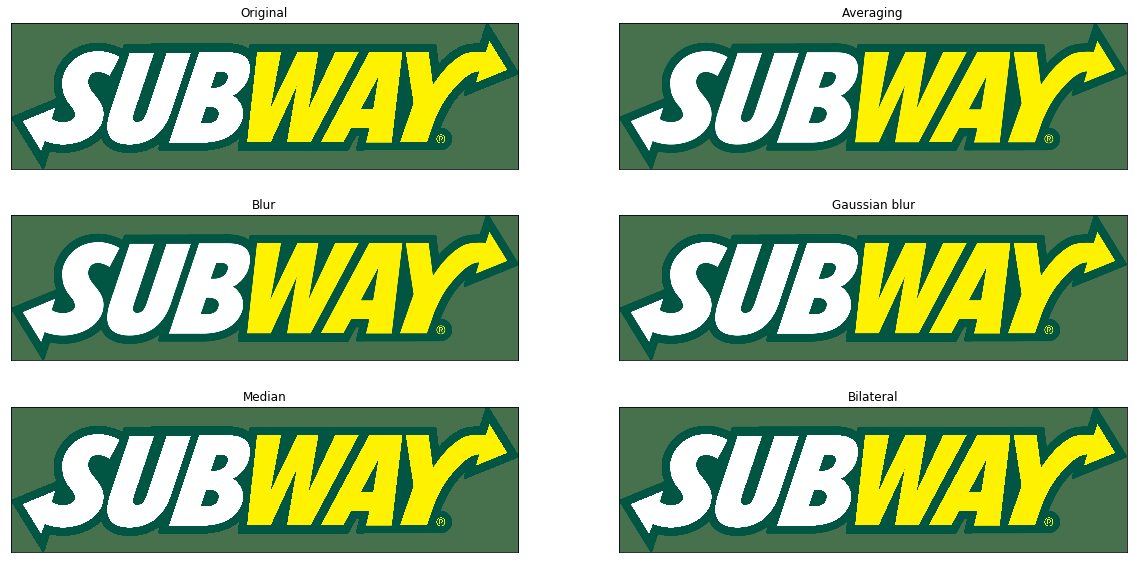

In [9]:
# Blurs

img = cv2.imread('subway_logo.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))

kernel = np.ones((5,5), np.float32) / 25
dst = cv2.filter2D(img, -1, kernel)

plt.subplot(321)
plt.imshow(img)
plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(322)
plt.imshow(dst)
plt.title('Averaging')
plt.xticks([]), plt.yticks([])

blur = cv2.blur(img,(5,5))
plt.subplot(323)
plt.imshow(blur)
plt.title('Blur')
plt.xticks([]), plt.yticks([])

gaussian_blur = cv2.GaussianBlur(img,(5,5),0)
plt.subplot(324)
plt.imshow(gaussian_blur)
plt.title('Gaussian blur')
plt.xticks([]), plt.yticks([])

median = cv2.medianBlur(img,5)
plt.subplot(325)
plt.imshow(median)
plt.title('Median')
plt.xticks([]), plt.yticks([])

bilateral = cv2.bilateralFilter(img,9,75,75)
plt.subplot(326)
plt.imshow(bilateral)
plt.title('Bilateral')
plt.xticks([]), plt.yticks([])

plt.show()

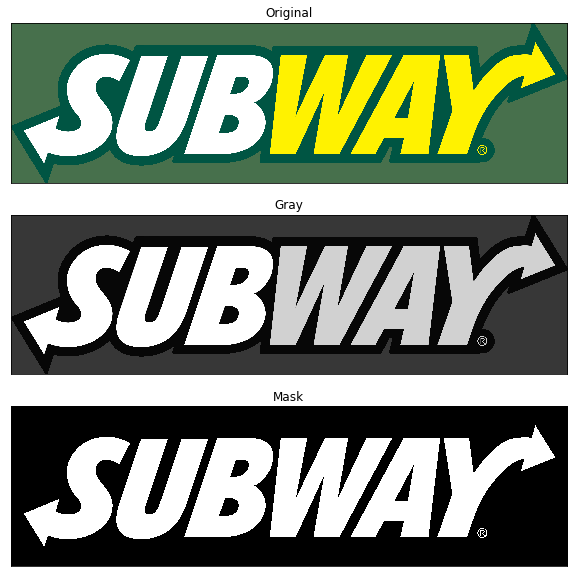

In [10]:
# Morphological Transformations

img = cv2.imread('subway_logo.png')
plt.figure(figsize=(20,10))

plt.subplot(311)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.xticks([]), plt.yticks([])

img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 100, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

plt.subplot(312)
plt.imshow(img2gray ,cmap='gray')
plt.title('Gray')
plt.xticks([]), plt.yticks([])

plt.subplot(313)
plt.imshow(mask ,cmap='gray')
plt.title('Mask')
plt.xticks([]), plt.yticks([])

plt.show()

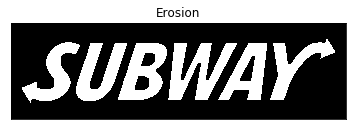

In [11]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(mask, kernel, iterations = 10)

plt.subplot(111)
plt.imshow(erosion ,cmap='gray')
plt.title('Erosion')
plt.xticks([]), plt.yticks([])
plt.show()

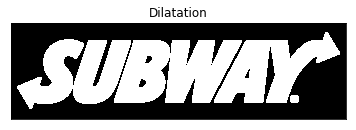

In [12]:
dilatation = cv2.dilate(mask, kernel, iterations = 10)

plt.subplot(111)
plt.imshow(dilatation ,cmap='gray')
plt.title('Dilatation')
plt.xticks([]), plt.yticks([])
plt.show()

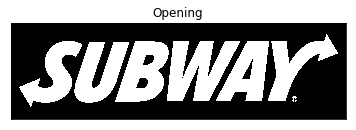

In [13]:
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

plt.subplot(111)
plt.imshow(opening ,cmap='gray')
plt.title('Opening')
plt.xticks([]), plt.yticks([])
plt.show()

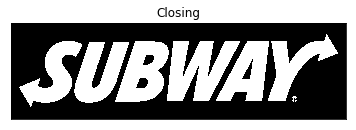

In [14]:
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

plt.subplot(111)
plt.imshow(closing ,cmap='gray')
plt.title('Closing')
plt.xticks([]), plt.yticks([])
plt.show()

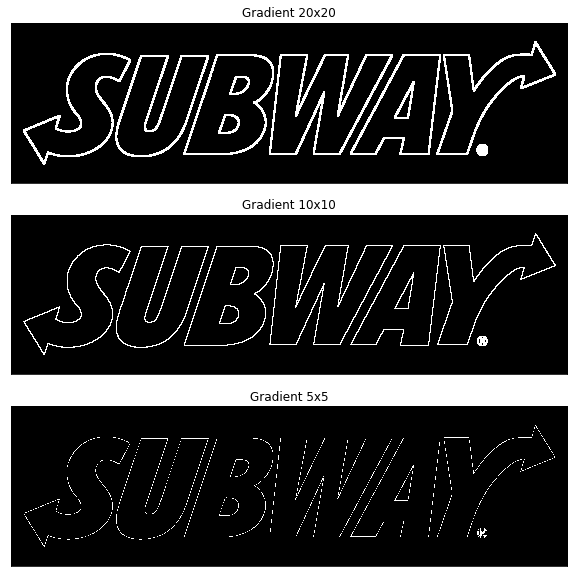

In [15]:
plt.figure(figsize=(20,10))

kernel = np.ones((20,20),np.uint8)
gradient = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel)

plt.subplot(311)
plt.imshow(gradient ,cmap='gray')
plt.title('Gradient 20x20')
plt.xticks([]), plt.yticks([])

kernel = np.ones((10,10),np.uint8)
gradient = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel)

plt.subplot(312)
plt.imshow(gradient ,cmap='gray')
plt.title('Gradient 10x10')
plt.xticks([]), plt.yticks([])

kernel = np.ones((5,5),np.uint8)
gradient = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel)

plt.subplot(313)
plt.imshow(gradient ,cmap='gray')
plt.title('Gradient 5x5')
plt.xticks([]), plt.yticks([])

plt.show()



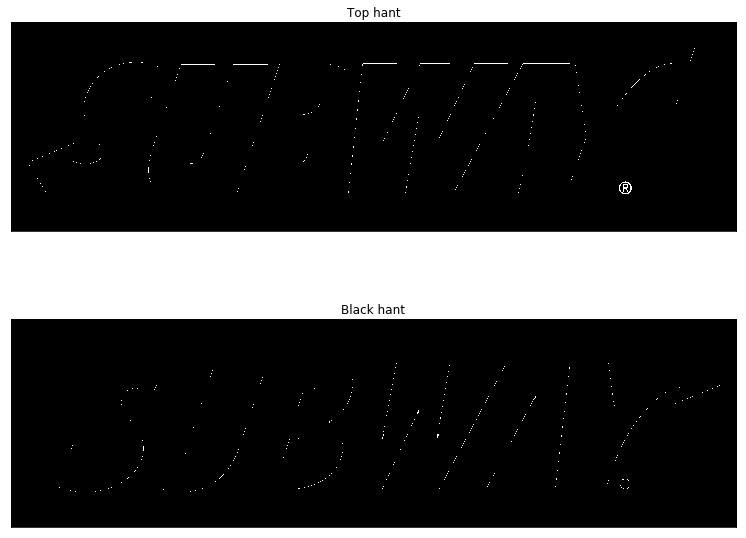

In [16]:
plt.figure(figsize=(13,10))

kernel = np.ones((10,10),np.uint8)

tophat = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernel)

plt.subplot(211)
plt.imshow(tophat ,cmap='gray')
plt.title('Top hant')
plt.xticks([]), plt.yticks([])

blackhat = cv2.morphologyEx(mask, cv2.MORPH_BLACKHAT, kernel)

plt.subplot(212)
plt.imshow(blackhat ,cmap='gray')
plt.title('Black hant')
plt.xticks([]), plt.yticks([])

plt.show()

# Image Gradients

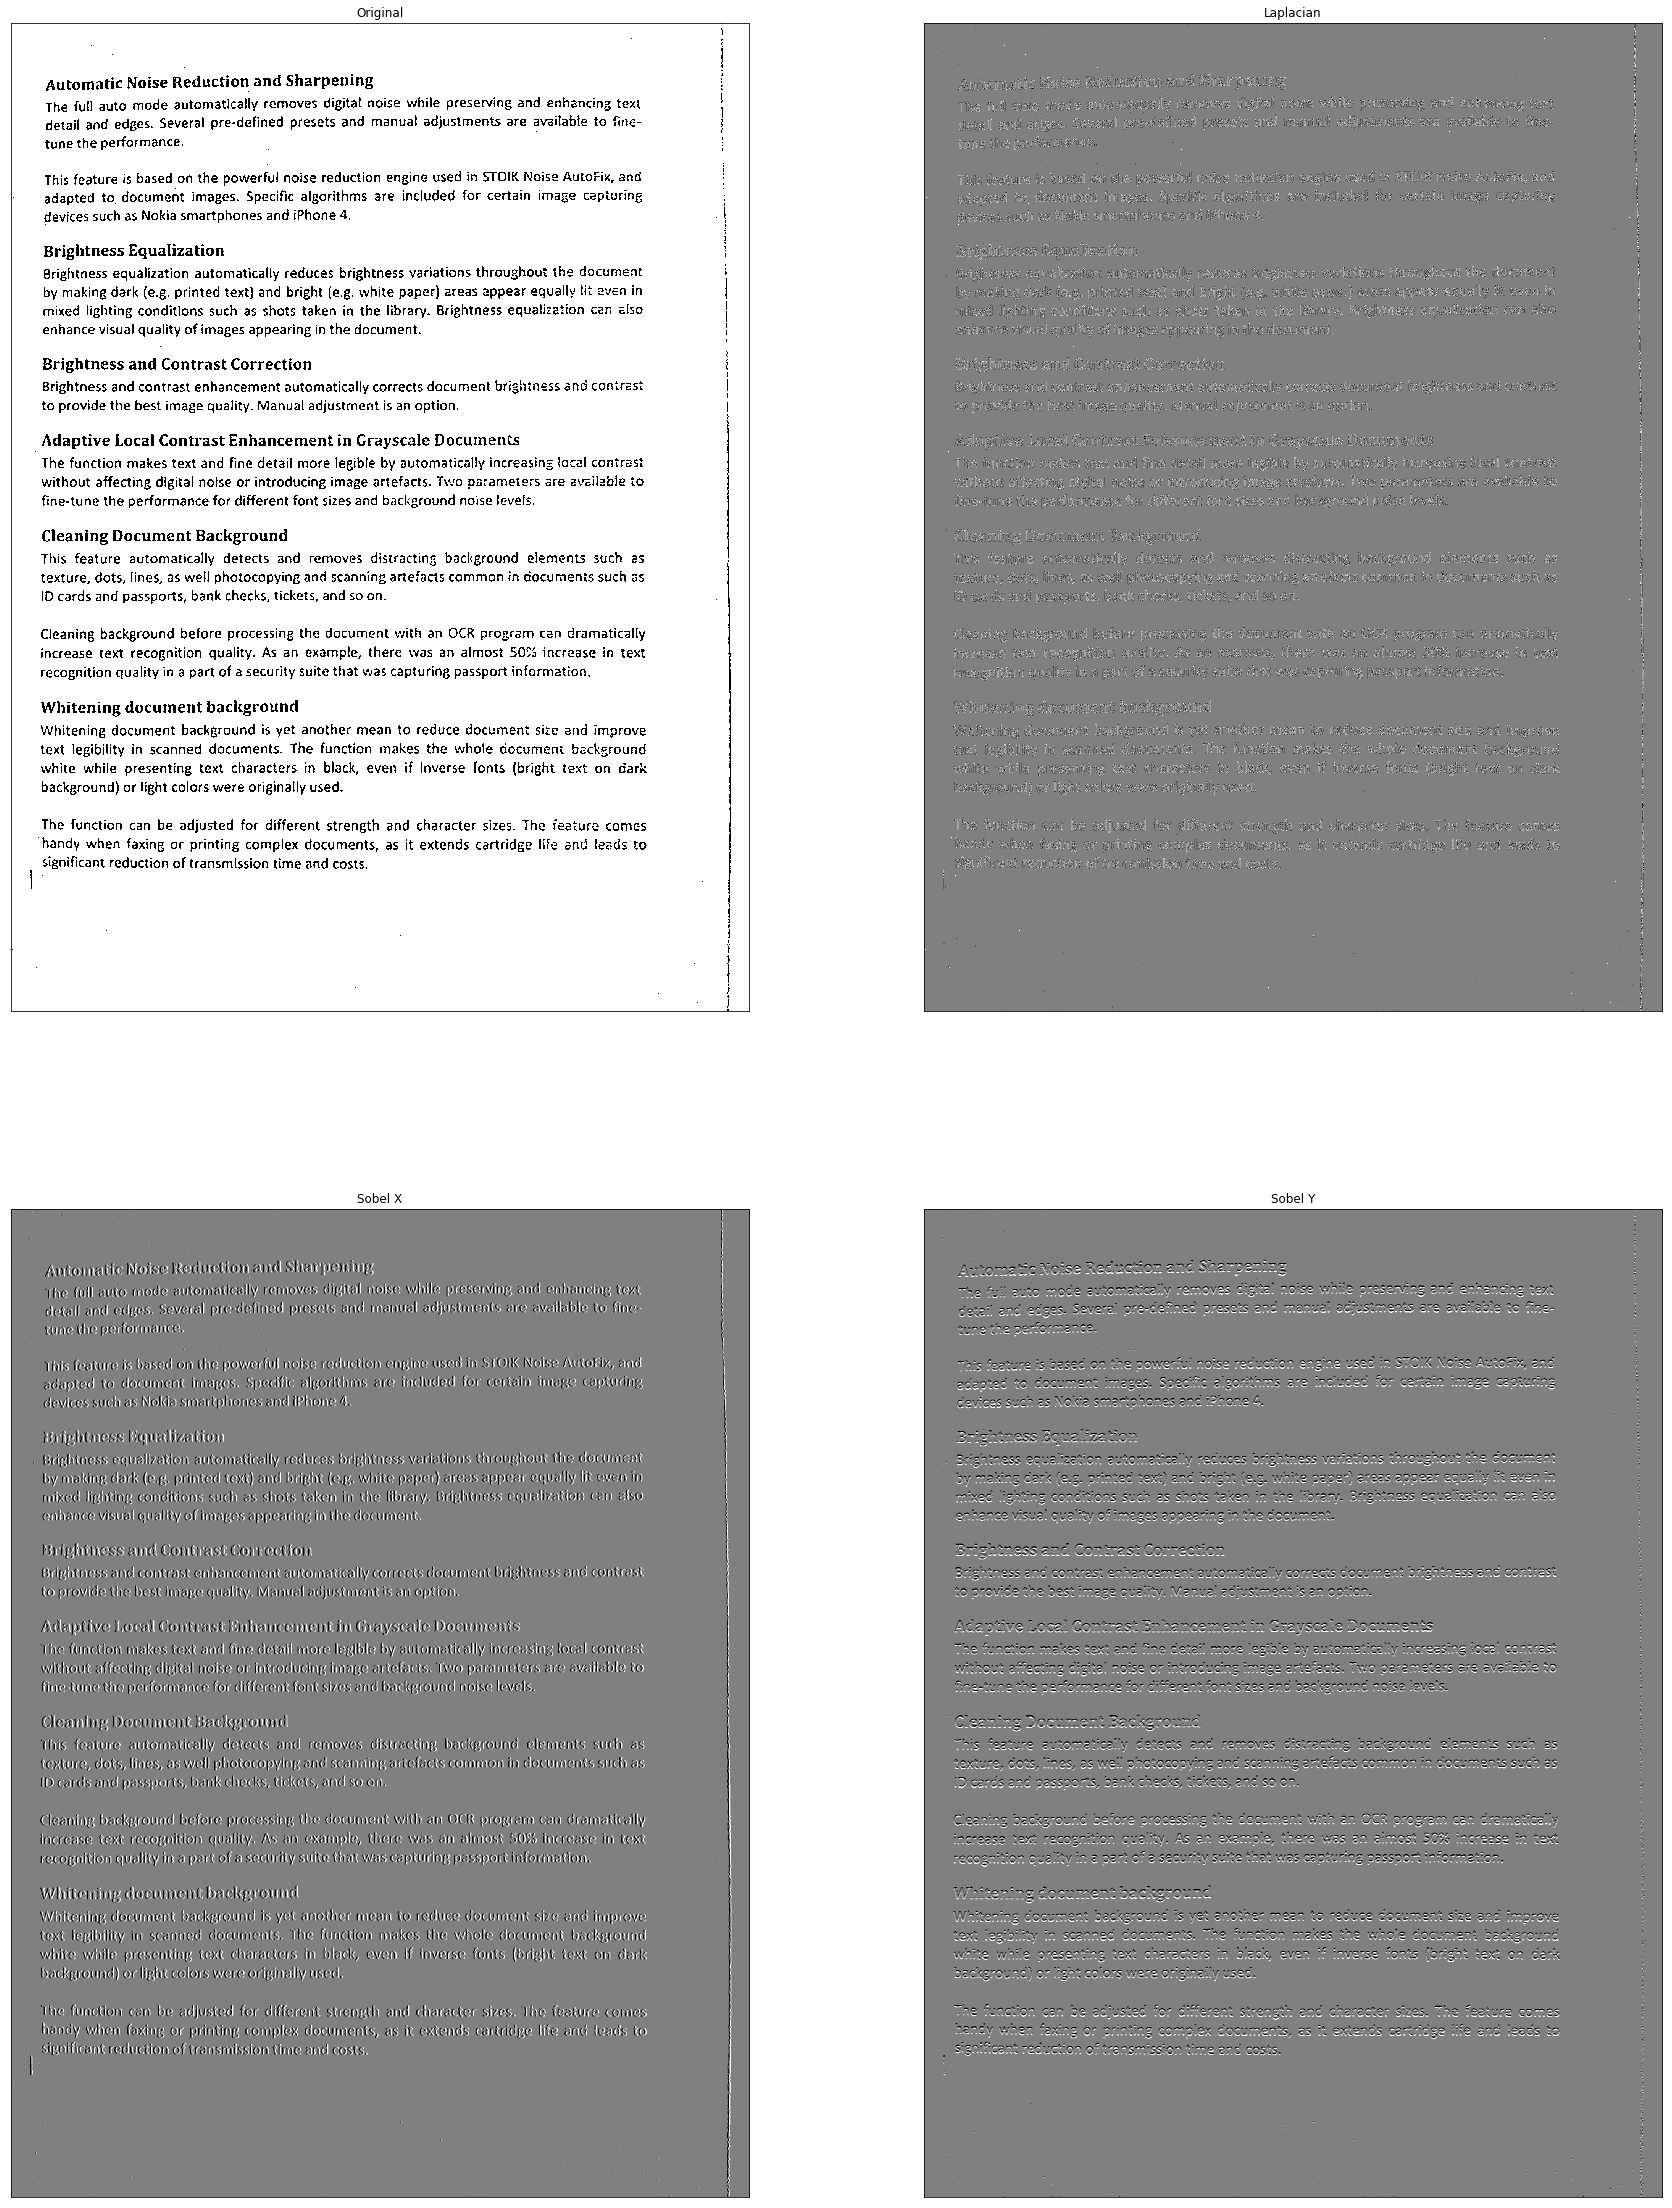

In [17]:
img = cv2.imread('scan.jpg',0)
img = cv2.medianBlur(img,5)
img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, 5)

plt.figure(figsize=(30,40))

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

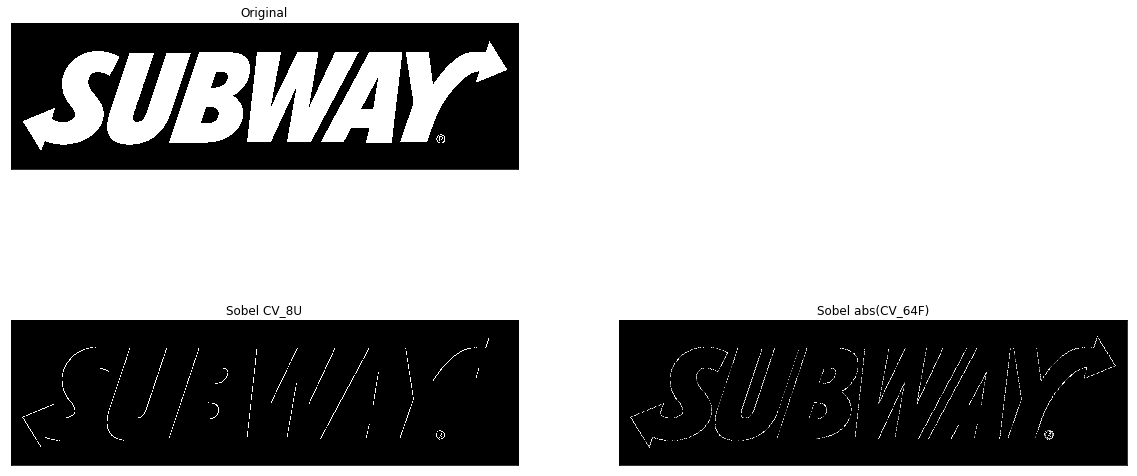

In [18]:
# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(mask, cv2.CV_8U, 1, 0, ksize=7)

plt.figure(figsize=(20,10))

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(mask, cv2.CV_64F, 1, 0, ksize=7)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(2,2,1),plt.imshow(mask,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()

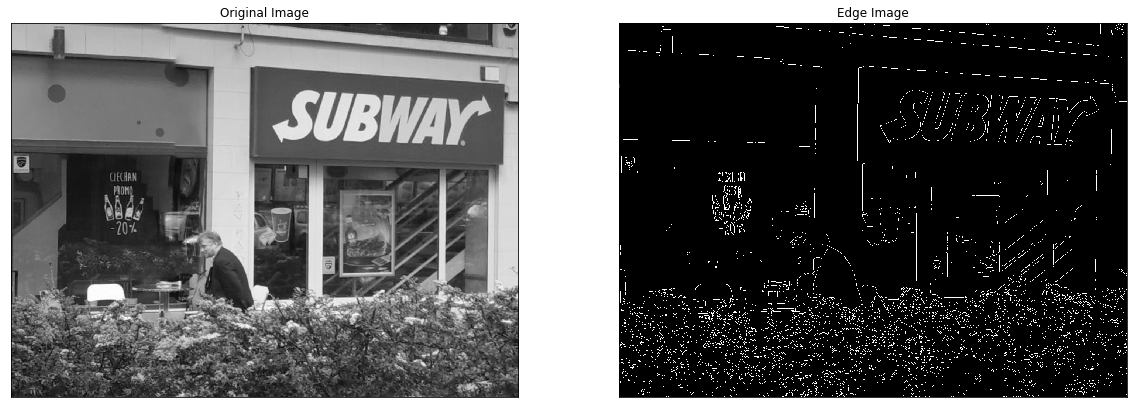

In [19]:
img = cv2.imread('subway_1.png',0)
edges = cv2.Canny(img, 200, 200)
plt.figure(figsize=(20,10))

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

(1016, 1376, 3)
(64, 86, 3)
(1024, 1376, 3)
3


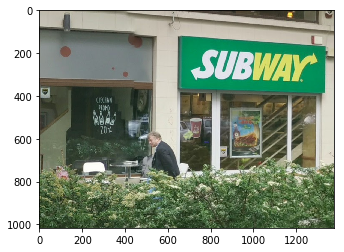

3


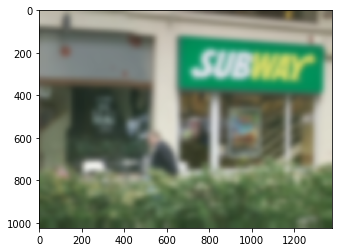

In [20]:
img_o = cv2.imread('subway_1.png')
img = img_o

print(img.shape)
img = cv2.pyrDown(img)
img = cv2.pyrDown(img)
img = cv2.pyrDown(img)
img = cv2.pyrDown(img)

print(img.shape)
img = cv2.pyrUp(img)
img = cv2.pyrUp(img)
img = cv2.pyrUp(img)
img = cv2.pyrUp(img)
print(img.shape)

show_image(img_o)
show_image(img)

In [21]:
# Counturs

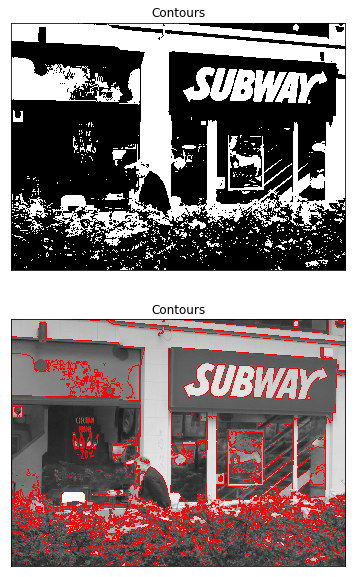

In [22]:
# Contours

img = cv2.imread('subway_1.png',0)
plt.figure(figsize=(20,10))

ret, thresh = cv2.threshold(img, 127, 255, 0)

im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

rgb = cv2.cvtColor(img, cv2.COLOR_BAYER_GR2BGR)
cv2.drawContours(rgb, contours, -1, (255, 0, 0), 2)


plt.subplot(211)
plt.imshow(thresh, cmap='gray')
plt.title('Contours')
plt.xticks([]), plt.yticks([])

plt.subplot(212)
plt.imshow(rgb, cmap='gray')
plt.title('Contours')
plt.xticks([]), plt.yticks([])

plt.show()

2499
718
[718.5, 2500.0]
[]


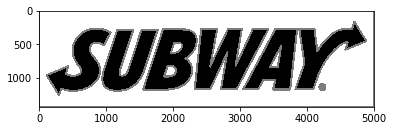

7178564.0
12870.0
[[[   0    0]]

 [[   0 1436]]

 [[4999 1436]]

 [[4999    0]]]
1287.0
[[[   0    0]]

 [[   0 1436]]

 [[4999 1436]]

 [[4999    0]]]


In [23]:
img = mask_inv
im2, contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[0]
M = cv2.moments(cnt)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

print(cx)
print(cy)
print([c/2 for c in img.shape[:2]])

# cv2.circle(img, (cx, cy), 25, 125, -1)
# cv2.circle(img, tuple([int(c/2) for c in img.shape[:2]]), 25, 125, -1)
cv2.drawContours(img, contours, -1, 125, 30)

show_image(mask_inv)

print(cv2.contourArea(cnt))
print(cv2.arcLength(cnt,True))

epsilon = 0.1*cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)

print(cnt)
print(epsilon)
print(approx)

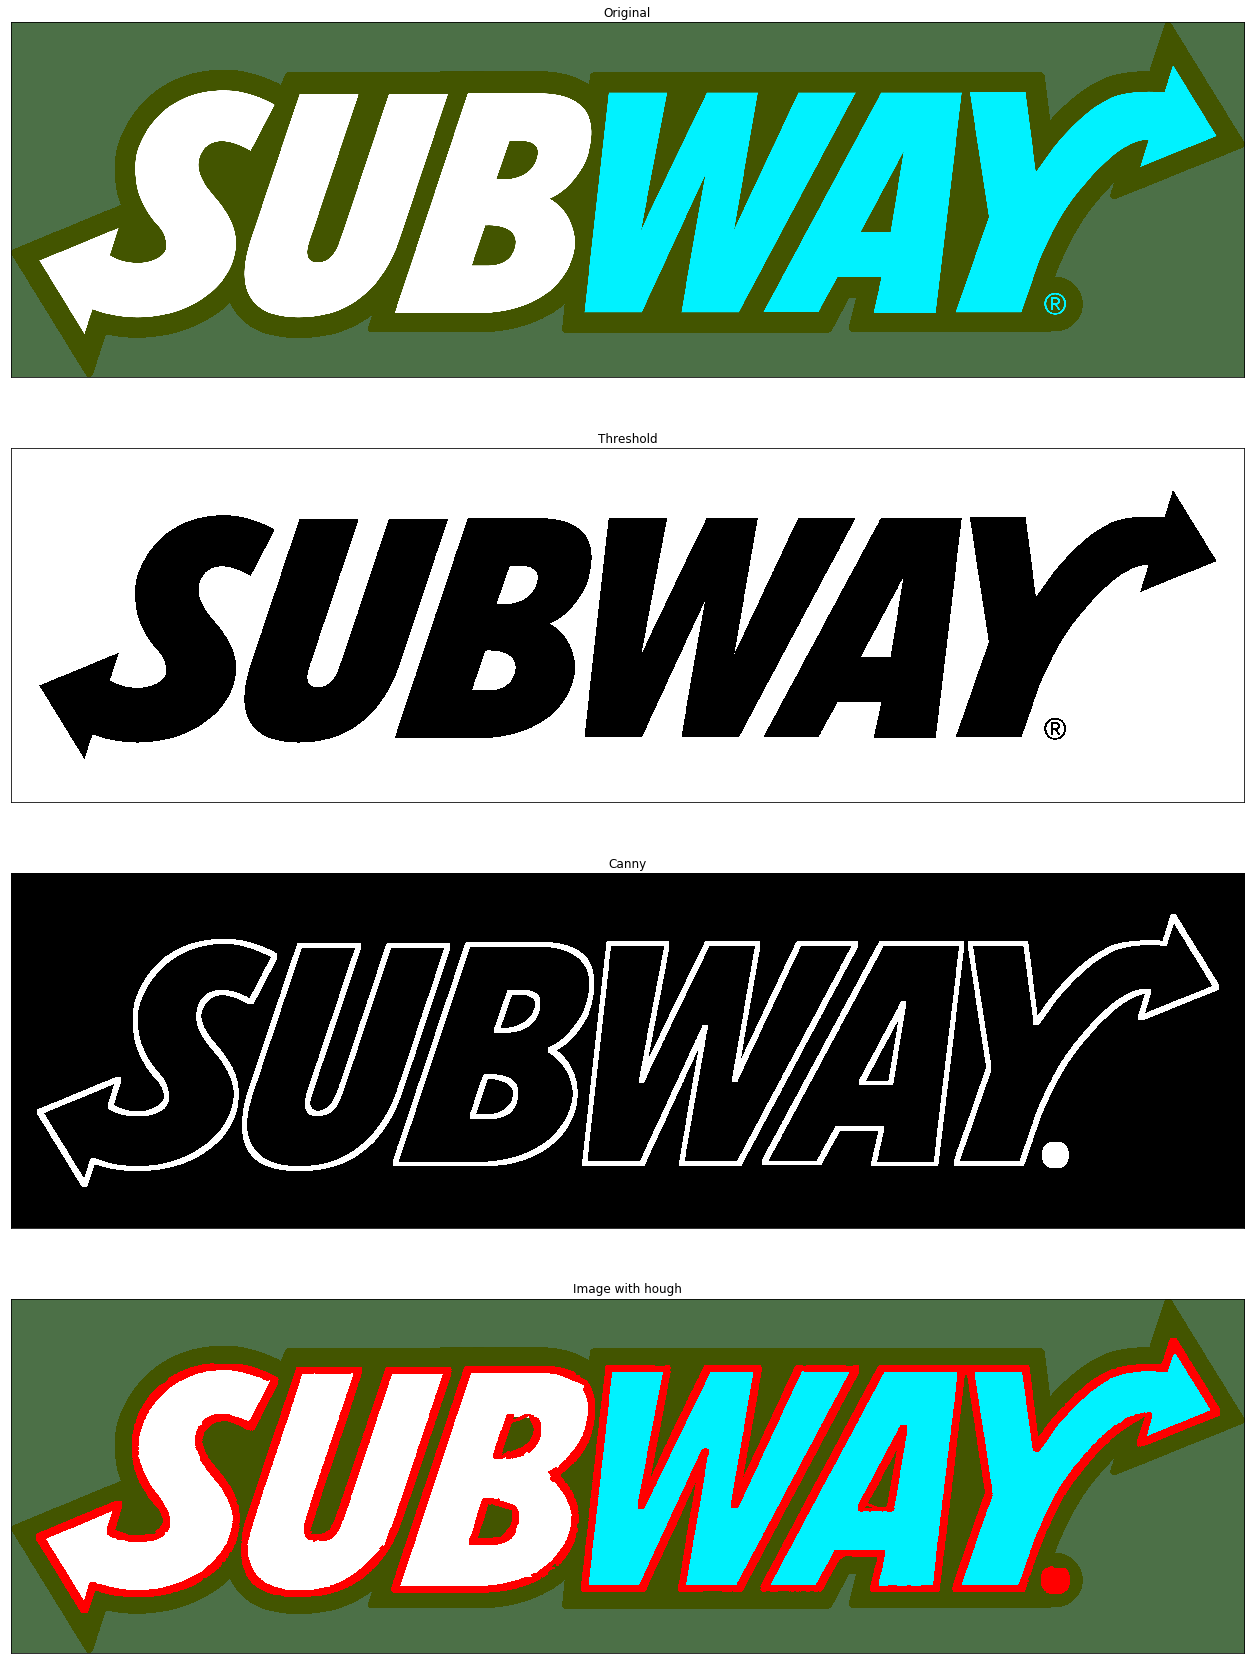

In [24]:
# Hough

img = cv2.imread('subway_logo.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(60,30))

plt.subplot(411)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(412)
plt.imshow(threshold, cmap='gray')
plt.title('Threshold')
plt.xticks([]), plt.yticks([])

canny = cv2.Canny(threshold, 200, 200)
canny = cv2.dilate(canny, kernel, iterations = 2)

plt.subplot(413)
plt.imshow(canny, cmap='gray')
plt.title('Canny')
plt.xticks([]), plt.yticks([])

lines = cv2.HoughLinesP(canny, 1, np.pi/180, 100, minLineLength = 5, maxLineGap = 20)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img, (x1,y1), (x2,y2), (255,0,0), 10)

plt.subplot(414)
plt.imshow(img, cmap='gray')
plt.title('Image with hough')
plt.xticks([]), plt.yticks([])

plt.show()

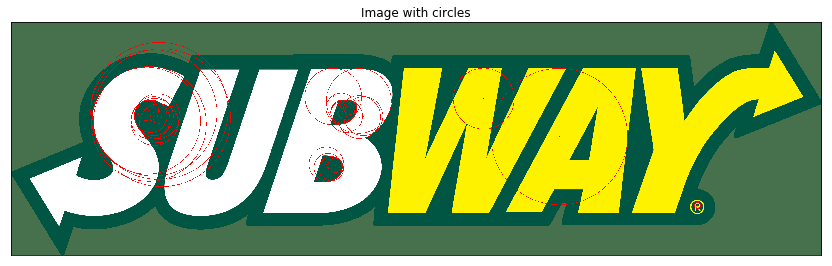

In [25]:
# Hough circles

img = cv2.imread('subway_logo.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

canny = cv2.Canny(threshold, 200, 200)
kernel = np.ones((20,20),np.uint8)
canny = cv2.dilate(canny, kernel, iterations = 2)

bluered = cv2.medianBlur(threshold,5)

circles = cv2.HoughCircles(bluered,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img,(i[0],i[1]),i[2],(0,0,255),2)
    # draw the center of the circle
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(60,30))
plt.subplot(611)
plt.imshow(img, cmap='gray')
plt.title('Image with circles')
plt.xticks([]), plt.yticks([])

plt.show()